In [33]:
import mido
import numpy as np
import matplotlib.pyplot as plt
#test
import Parser

In [34]:
dataset = Parser.load_dataset("adl-piano-midi")

In [35]:
songs = Parser.files_to_songs(dataset["Reggae"])

In [36]:
type(songs)
for song in songs:
    print(type(song))
    print(songs[song])

<class 'str'>
[[0, 58, 95, 0], [0, 62, 95, 0], [0, 63, 95, 0], [0, 67, 95, 0], [0, 62, 0, 384], [0, 63, 0, 0], [0, 67, 0, 0], [0, 58, 0, 0], [0, 56, 95, 0], [0, 60, 95, 0], [0, 63, 95, 0], [0, 67, 95, 0], [0, 60, 0, 768], [0, 56, 0, 0], [0, 67, 0, 0], [0, 63, 0, 0], [0, 58, 95, 0], [0, 62, 95, 0], [0, 63, 95, 0], [0, 67, 95, 0], [0, 62, 0, 384], [0, 63, 0, 0], [0, 58, 0, 0], [0, 67, 0, 0], [0, 56, 95, 0], [0, 60, 95, 0], [0, 63, 95, 0], [0, 67, 95, 0], [1, 79, 68, 0], [1, 79, 0, 0], [1, 84, 72, 0], [1, 86, 80, 0], [1, 84, 0, 0], [1, 91, 68, 0], [1, 86, 0, 0], [0, 67, 0, 0], [0, 60, 0, 0], [0, 56, 0, 0], [1, 96, 72, 0], [0, 63, 0, 0], [1, 91, 0, 0], [0, 58, 95, 0], [0, 62, 95, 0], [0, 63, 95, 0], [0, 67, 95, 0], [1, 91, 72, 0], [1, 96, 0, 0], [1, 91, 0, 0], [0, 62, 0, 384], [0, 63, 0, 0], [0, 67, 0, 0], [0, 58, 0, 0], [0, 56, 95, 0], [0, 60, 95, 0], [0, 63, 95, 0], [0, 67, 95, 0], [0, 60, 0, 768], [0, 56, 0, 0], [0, 67, 0, 0], [0, 63, 0, 0], [0, 58, 95, 0], [0, 62, 95, 0], [0, 63, 95, 0

In [37]:
def extract_notes(songs):
    matrix = []
    for song in songs :
        l = [0]*len(songs[song])
        for i,seq in enumerate(songs[song]) :
            l[i]=seq[1]
        matrix.append(l)
    return matrix

In [38]:
notes = extract_notes(songs)

In [39]:
def create_dict(notes):
    flatt_notes = [element for n in notes for element in n]

    dict_notes = {}
    for note in flatt_notes:
        if note not in dict_notes:
            dict_notes[note] = len(dict_notes)
    return dict_notes

In [40]:
create_dict(notes)

{58: 0,
 62: 1,
 63: 2,
 67: 3,
 56: 4,
 60: 5,
 79: 6,
 84: 7,
 86: 8,
 91: 9,
 96: 10,
 74: 11,
 77: 12,
 82: 13,
 87: 14,
 72: 15,
 89: 16,
 59: 17,
 65: 18,
 75: 19,
 41: 20,
 46: 21,
 48: 22,
 55: 23,
 70: 24,
 44: 25,
 61: 26,
 68: 27,
 51: 28,
 29: 29,
 57: 30,
 28: 31,
 31: 32,
 32: 33,
 33: 34,
 45: 35,
 64: 36,
 53: 37,
 38: 38,
 50: 39,
 36: 40,
 35: 41,
 47: 42,
 34: 43,
 26: 44,
 54: 45,
 43: 46,
 66: 47,
 52: 48,
 69: 49,
 27: 50,
 39: 51,
 76: 52,
 40: 53,
 83: 54,
 80: 55,
 37: 56,
 71: 57,
 49: 58,
 73: 59,
 81: 60,
 24: 61,
 88: 62,
 85: 63,
 78: 64,
 42: 65,
 90: 66,
 92: 67,
 93: 68,
 98: 69,
 30: 70,
 101: 71,
 103: 72,
 104: 73,
 105: 74,
 94: 75,
 95: 76,
 100: 77,
 97: 78}

In [41]:
##C'est applati mais c'est du reggae donc ok ? on pourra découper après ? pck c'était pas évident sinon pour la taille du training set

In [42]:
def one_hot_encoding_train(dict_notes, training_set):
    one_hot_training = np.zeros((training_set.shape[0], training_set.shape[1], len(dict_notes)))
    for i in range(training_set.shape[0]):
        for j in range(training_set.shape[1]):
            one_hot_training[i,j, dict_notes[training_set[i,j]]] = 1
    return one_hot_training


In [43]:
def one_hot_encoding(dict_notes,notes):
    k = len(dict_notes)
    one_hot = np.zeros((len(notes), k))
    for i in range(len(notes)):
        one_hot[i][dict_notes[notes[i]]] = 1
    return one_hot


In [44]:
def treat_notes(notes):
    return [element for n in notes for element in n]


In [45]:
flatt_notes = treat_notes(notes)
dict_notes = create_dict(notes)
flatt_notes = np.array(flatt_notes)
notes_one_hot = one_hot_encoding(dict_notes,flatt_notes)

In [46]:
notes_one_hot

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
notes_one_hot.shape

(64740, 79)

In [48]:
def create_train_label_notes_only(notes):
    training_set = []
    label_set = []
    for i in range(len(notes)-5):
        training_set.append(notes[i:i+5])
        label_set.append(notes[i+5])
    return training_set, label_set

In [49]:
def create_weight(notes):
    # Calculer les poids en fonction de la fréquence des notes
    note_counts = {}
    for note in notes:
        for element in note:
            if element in note_counts:
                note_counts[element] += 1
            else:
                note_counts[element] = 1
    
    # Calculer les poids pour chaque note
    total_notes = sum(note_counts.values())
    weights = {note: count/total_notes for note, count in note_counts.items()}
    
    return weights

In [50]:
weights = create_weight(notes)

In [51]:
training_set, label_set = create_train_label_notes_only(flatt_notes)
training_set = np.array(training_set)
label_set = np.array(label_set)

print(training_set.shape)
training_one_hot = one_hot_encoding_train(dict_notes,training_set)
print(training_one_hot.shape)
label_one_hot = one_hot_encoding(dict_notes,label_set)
print(label_one_hot.shape)

(64735, 5)
(64735, 5, 79)
(64735, 79)


In [52]:
from keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from keras import optimizers

In [53]:
##Simple RNN model
model = Sequential()
dim = len(dict_notes)
model.add(SimpleRNN(units=dim, input_shape=(5,dim)))
model.summary()


c:\Users\anhly\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)        │ (None, 79)             │        12,561 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,561 (49.07 KB)

 Trainable params: 12,561 (49.07 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:


# Utiliser la loss function pondérée avec les poids de fréquence de notes
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-2), loss='mean_squared_error', metrics=['accuracy'])

# Train the model
model.fit(training_one_hot, label_one_hot, epochs=20, batch_size=100,class_weight=weights)

Epoch 1/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1656 - loss: 0.0059
Epoch 2/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1866 - loss: 0.0047
Epoch 3/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1888 - loss: 0.0047
Epoch 4/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1909 - loss: 0.0047
Epoch 5/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1898 - loss: 0.0047
Epoch 6/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1912 - loss: 0.0048
Epoch 7/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1930 - loss: 0.0048
Epoch 8/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1913 - loss: 0.0048
Epoch 9/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1918 - loss: 0.0047
Epoch 10/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1900 - loss: 0.0048
Epoch 11/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1926 - loss: 0.0047
Epoch 12/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

In [55]:




# Utiliser la loss function pondérée avec les poids de fréquence de notes
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-2), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(training_one_hot, label_one_hot, epochs=20, batch_size=100,class_weight=weights)


Epoch 1/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0859 - loss: 3.9552
Epoch 2/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0804 - loss: 3.2552
Epoch 3/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0802 - loss: 3.2596
Epoch 4/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0828 - loss: 3.1808
Epoch 5/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0805 - loss: 3.2005
Epoch 6/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0825 - loss: 3.2048
Epoch 7/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0826 - loss: 3.2242
Epoch 8/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0820 - loss: 3.2218
Epoch 9/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0815 - loss: 3.2156
Epoch 10/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0827 - loss: 3.2223
Epoch 11/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0849 - loss: 3.2423
Epoch 12/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step

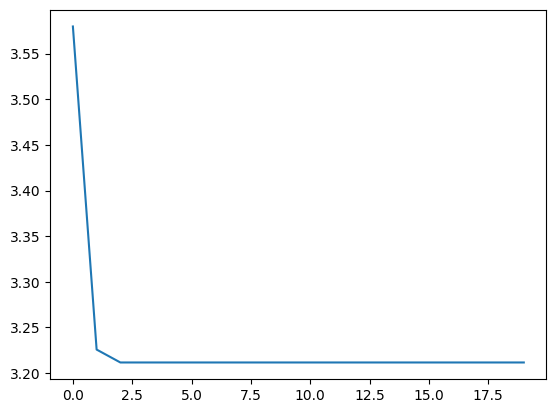

In [56]:
#Print the loss function
loss = model.history.history['loss']
plt.plot(range(len(loss)), loss)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 79)             │        50,244 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,244 (196.27 KB)

 Trainable params: 50,244 (196.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.0277 - loss: 4.3481
Epoch 2/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0344 - loss: 4.3255
Epoch 3/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.0273 - loss: 4.3786
Epoch 4/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0248 - loss: 3.8721
Epoch 5/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.0244 - loss: 3.7248
Epoch 6/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.0314 - loss: 3.6772
Epoch 7/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0368 - loss: 3.7859
Epoch 8/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.0225 - loss: 3.8041
Epoch 9/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.0278 - loss: 3.8933
Epoch 10/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.0225 - loss: 3.6038
Epoch 11/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.0240 - loss: 3.5219
Epoch 12/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 7s

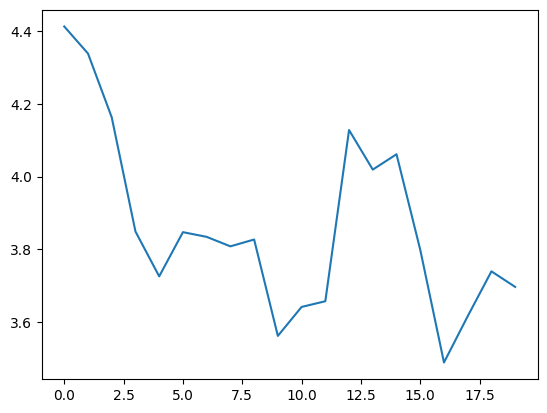

In [57]:
##LSTM Architecture

from tensorflow.keras.layers import LSTM

model = Sequential()
dim = len(dict_notes)
model.add(LSTM(units=dim, input_shape=(5,dim)))
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compile the model
model.fit(training_one_hot, label_one_hot, epochs=20, batch_size=100,class_weight=weights)  # Fit the model

#Print the loss function
loss = model.history.history['loss']
plt.plot(range(len(loss)), loss)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 79)             │        37,920 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,920 (148.12 KB)

 Trainable params: 37,920 (148.12 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.0193 - loss: 4.3177
Epoch 2/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0295 - loss: 4.2640
Epoch 3/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0447 - loss: 4.1874
Epoch 4/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.0376 - loss: 4.2092
Epoch 5/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0331 - loss: 4.2023
Epoch 6/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0375 - loss: 4.0890
Epoch 7/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.0431 - loss: 4.2378
Epoch 8/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.0374 - loss: 4.0594
Epoch 9/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0240 - loss: 4.0547
Epoch 10/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.0201 - loss: 4.0150
Epoch 11/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.0222 - loss: 3.8740
Epoch 12/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/

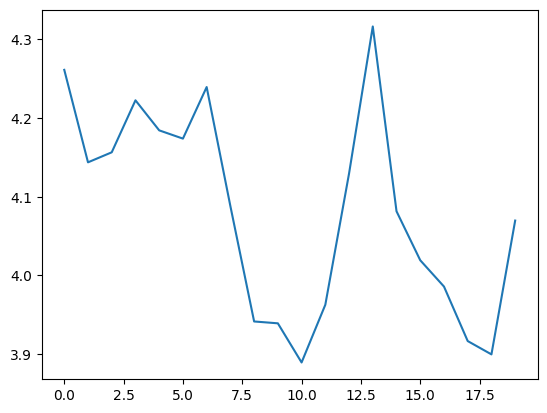

In [60]:
#GRU architecture 

from tensorflow.keras.layers import GRU

model = Sequential()
dim = len(dict_notes)
model.add(GRU(units=dim, input_shape=(5, dim)))  # Replace LSTM with GRU
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compile the model
model.fit(training_one_hot, label_one_hot, epochs=20, batch_size=100, class_weight=weights)  # Fit the model

# Print the loss function
loss = model.history.history['loss']
plt.plot(range(len(loss)), loss)


2 layer comparison

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 5, 79)          │        12,561 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 79)             │        12,561 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,122 (98.13 KB)

 Trainable params: 25,122 (98.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.0367 - loss: 4.1697
Epoch 2/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0459 - loss: 3.8515
Epoch 3/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0389 - loss: 3.8951
Epoch 4/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0182 - loss: 3.9800
Epoch 5/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0262 - loss: 3.8701
Epoch 6/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0348 - loss: 3.9108
Epoch 7/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0165 - loss: 4.1065
Epoch 8/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0117 - loss: 3.8995
Epoch 9/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0150 - loss: 4.0319
Epoch 10/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0398 - loss: 3.7990
Epoch 11/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0580 - loss: 3.9414
Epoch 12/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step

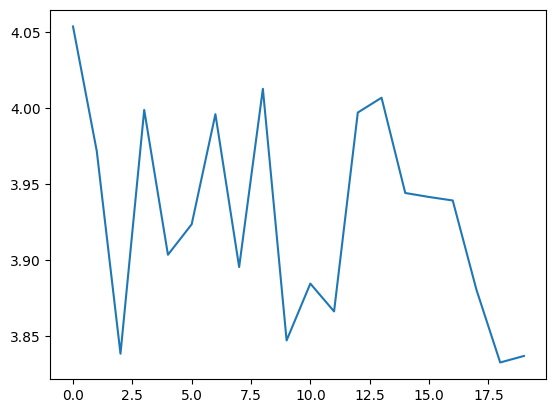

In [61]:
model_rnn = Sequential()
dim = len(dict_notes)
model_rnn.add(SimpleRNN(units=dim, input_shape=(5,dim), return_sequences=True))  # First RNN layer with return_sequences=True
model_rnn.add(SimpleRNN(units=dim))  # Second RNN layer (no return_sequences=True as it's the last layer)
model_rnn.summary()

# Compile the RNN model
model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the RNN model
history_rnn = model_rnn.fit(training_one_hot, label_one_hot, epochs=20, batch_size=100, class_weight=weights)

# Print the loss function for RNN model
loss_rnn = history_rnn.history['loss']
plt.plot(range(len(loss_rnn)), loss_rnn, label='RNN')

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 5, 79)          │        50,244 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 79)             │        50,244 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,488 (392.53 KB)

 Trainable params: 100,488 (392.53 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.0452 - loss: 4.1505
Epoch 2/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.0389 - loss: 3.8801
Epoch 3/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.0149 - loss: 3.9230
Epoch 4/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.0084 - loss: 3.9913
Epoch 5/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.0140 - loss: 4.0302
Epoch 6/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.0520 - loss: 3.7415
Epoch 7/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.0518 - loss: 4.1226
Epoch 8/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.0502 - loss: nan
Epoch 9/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.0202 - loss: nan
Epoch 10/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.0185 - loss: nan
Epoch 11/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.0207 - loss: nan
Epoch 12/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/st

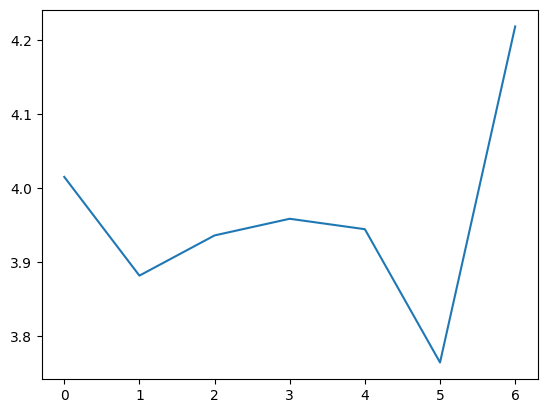

In [62]:
model = Sequential()
dim = len(dict_notes)
model.add(LSTM(units=dim, input_shape=(5,dim), return_sequences=True))  # First LSTM layer with return_sequences=True
model.add(LSTM(units=dim))  # Second LSTM layer (no return_sequences=True as it's the last layer)
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compile the model
model.fit(training_one_hot, label_one_hot, epochs=20, batch_size=100, class_weight=weights)  # Fit the model

# Print the loss function
loss = model.history.history['loss']
plt.plot(range(len(loss)), loss)

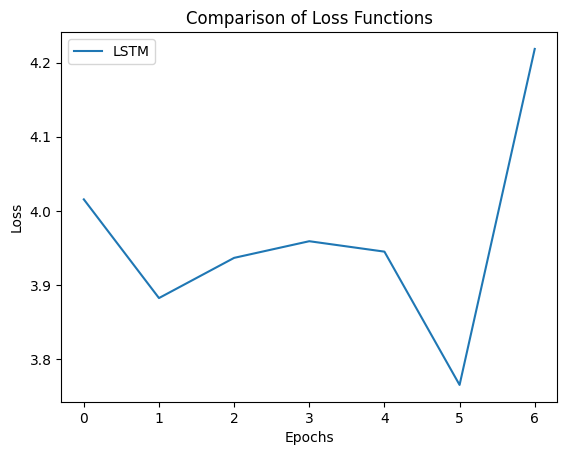

In [63]:
# Plot the loss functions for both models
plt.plot(range(len(loss)), loss, label='LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparison of Loss Functions')
plt.legend()
plt.show()


In [58]:
#synthetize

def synthesize_model(model, x_0, n):
    samples = []
    x = np.copy(x_0)
    for _ in range(n):
        prediction = model.predict(x[np.newaxis, :, :])  # Prédire la note suivante
        samples.append(prediction)
        x = np.concatenate((x[1:, :], prediction), axis=0)  # Mettre à jour la séquence d'entrée avec la prédiction
    return np.array(samples)

In [59]:
def ind_to_notes(indices, dict_notes):
    
    notes = [dict_notes[ind] for ind in indices]
    return notes